In [83]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

In [84]:
radius_dim=4*u.kpc
r_d_dim = 10*u.kpc
h_d_dim=0.35*u.kpc
eta_dim = (10e25*(u.cm**2/u.s)).to(u.kpc**2/u.Gyr)
h_dim=h_d_dim*np.sqrt(1+((radius_dim/r_d_dim)**2))
td_dim=(h_dim**2/eta_dim.to(u.kpc**2/u.Gyr))
B_0_dim=8.2e-6*u.G
omega_0_dim=127*u.km/(u.s*u.kpc)
r_omega_dim=2*u.kpc
l_dim=0.1*u.kpc
omega_dim = omega_0_dim*(1+((radius_dim/r_omega_dim)**2))**(-1/2)
alpha_0_dim=(l_dim**2)*omega_dim/h_dim
G_dim=-omega_dim
G_dim = -45.6*u.km/(u.s*u.kpc)

U_0_dim=1*u.km/u.s
#km kpc/s
k_dim=0.1*(u.km*u.kpc/u.s)


R_dim=20*u.kpc
z_i_dim = -h_dim
z_f_dim= h_dim


In [85]:
T=27
Nt=int(2000*T)


In [86]:


#open npy files
algebraic_with_outflow = np.load('B_strength_alg_with_u.npy')
algebraic_no_outflow = np.load('B_strength_alg_no_u.npy')
dynamic_k3_with_outflow = np.load('B_list_after alpha correction_TRIAL 2_u and k not zero.npy')
dynamic_k3_no_outflow = np.load('Dynamic_u0k3.npy')
dynamic_k0_with_outflow = np.load('Dynamic_u1k0.npy')
dynamic_k0_no_outflow = np.load('Dynamic_u0k0.npy')





In [87]:
#calculating strength of dynamoc flows
B_r_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[0]
B_phi_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[1]
B_z_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[2]

B_r_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[0]
B_phi_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[1]
B_z_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[2]

B_r_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[0]
B_phi_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[1]
B_z_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[2]

B_r_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[0]
B_phi_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[1]
B_z_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[2]

B_tot_dynamic_k3_with_outflow = np.sqrt(B_r_list_dynamic_k3_with_outflow**2 + B_phi_list_dynamic_k3_with_outflow**2 )
B_tot_dynamic_k3_no_outflow = np.sqrt(B_r_list_dynamic_k3_no_outflow**2 + B_phi_list_dynamic_k3_no_outflow**2 )
B_tot_dynamic_k0_with_outflow = np.sqrt(B_r_list_dynamic_k0_with_outflow**2 + B_phi_list_dynamic_k0_with_outflow**2 )
B_tot_dynamic_k0_no_outflow = np.sqrt(B_r_list_dynamic_k0_no_outflow**2 + B_phi_list_dynamic_k0_no_outflow**2 )




In [88]:
#plot time vs strength
time=np.linspace(0,T,Nt+1)
#make time binto myr using eta_dim and h
time = time*td_dim

In [89]:
print(np.shape(algebraic_no_outflow))
print(np.shape(B_tot_dynamic_k0_no_outflow))
print(np.shape(B_z_list_dynamic_k0_no_outflow))
print(np.shape(time))

(54001, 50)
(54001, 51)
(54001, 51)
(54001,)


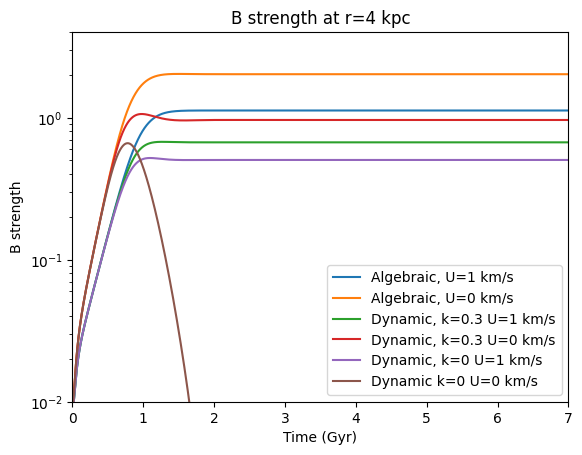

/tmp/ipykernel_98255/743825802.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1)


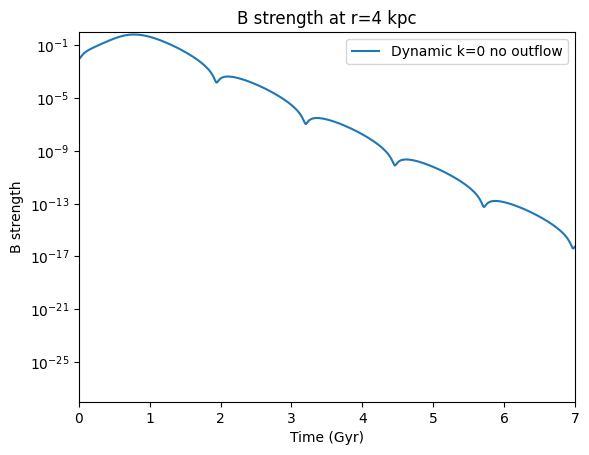

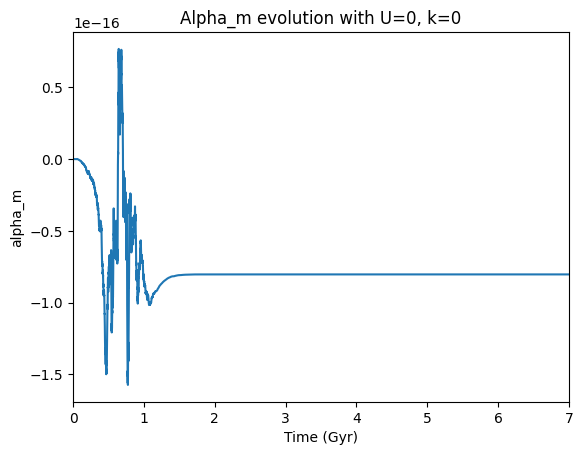

In [90]:
space_index = 25
plt.plot(time, algebraic_with_outflow[:,space_index], label='Algebraic, U=1 km/s')
plt.plot(time, algebraic_no_outflow[:,space_index], label='Algebraic, U=0 km/s')
plt.plot(time, B_tot_dynamic_k3_with_outflow[:,space_index], label='Dynamic, k=0.3 U=1 km/s')
plt.plot(time, B_tot_dynamic_k3_no_outflow[:,space_index], label='Dynamic, k=0.3 U=0 km/s')
plt.plot(time, B_tot_dynamic_k0_with_outflow[:,space_index], label='Dynamic, k=0 U=1 km/s')
plt.plot(time, B_tot_dynamic_k0_no_outflow[:,space_index], label='Dynamic k=0 U=0 km/s')
plt.xlabel('Time (Gyr)')
plt.xlim(0,7)
plt.ylabel('B strength')
plt.yscale("log")
plt.legend()
plt.ylim(0.01,4)
plt.title('B strength at r=4 kpc')
plt.show()

plt.plot(time, B_tot_dynamic_k0_no_outflow[:,space_index], label='Dynamic k=0 no outflow')
plt.xlabel('Time (Gyr)')
plt.xlim(0,7)
plt.ylabel('B strength')
plt.yscale("log")
plt.ylim(0,1)
plt.legend()
plt.title('B strength at r=4 kpc')
plt.show()

plt.plot(time, B_z_list_dynamic_k0_no_outflow[:,space_index], label='Dynamic k=0.3 no outflow')
plt.xlabel('Time (Gyr)')
plt.xlim(0,7)
plt.ylabel('alpha_m')

plt.title('Alpha_m evolution with U=0, k=0')
plt.show()

    
